In [26]:
import numpy as np 
import pandas as pd 
import os

In [27]:
directory = "PokemonData1"
labels = os.listdir(directory)
nb = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'O

In [28]:
print(nb)

140


In [29]:
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping

In [30]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            

            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [31]:
X, y = input_target_split(directory,labels)

Completed: Zubatstuffdslash

In [33]:
len(stored)

140

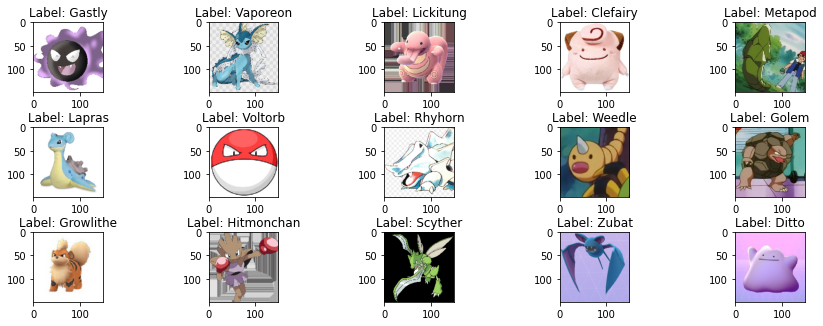

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [35]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139])

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139]), array([27, 26, 19, 30, 30, 30, 29, 32, 34, 24, 32, 32, 28, 35, 30, 39, 38,
       34, 34, 32, 31, 31, 29, 32, 37, 21, 32, 46, 29, 31, 31, 37, 37, 39,
       38, 40, 37, 34, 39, 27, 32, 30, 38, 34, 37, 28, 35, 37, 33, 40,

In [37]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [38]:
y_train = np.eye(nb)[y_train]
y_test = np.eye(nb)[y_test]

In [39]:
from tensorflow.keras.applications import DenseNet201

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

74842112/74836368 [==============================] - 21s 0us/step


In [40]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(nb, activation=tf.nn.softmax))
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
filepath= "model_pokemon.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00001)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

In [43]:
hist = model.fit_generator(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=5,
                                        callbacks=callbacks_list)

Epoch 1/5
155/155 [==============================] - 459s 3s/step - loss: 1.6046 - accuracy: 0.6667 - val_loss: 0.8522 - val_accuracy: 0.7706

Epoch 00001: val_accuracy improved from -inf to 0.77061, saving model to model_pokemon.h5
Epoch 2/5
155/155 [==============================] - 463s 3s/step - loss: 0.7874 - accuracy: 0.8250 - val_loss: 0.6517 - val_accuracy: 0.8136

Epoch 00002: val_accuracy improved from 0.77061 to 0.81362, saving model to model_pokemon.h5
Epoch 3/5
  1/155 [..............................] - ETA: 6:54 - loss: 0.5067 - accuracy: 0.8125

KeyboardInterrupt: 

In [44]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

[102 103  86 ...  46   7  16]


In [45]:
ground = np.argmax(y_test,axis=1)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

                  precision    recall  f1-score   support

            Abra       0.62      1.00      0.76         8
      Aerodactyl       1.00      0.33      0.50         9
        Alakazam       1.00      0.43      0.60         7
Alolan Sandslash       1.00      0.91      0.95        11
           Arbok       0.77      0.91      0.83        11
        Articuno       0.93      0.87      0.90        15
        Beedrill       1.00      0.80      0.89         5
      Bellsprout       1.00      0.88      0.93         8
       Blastoise       0.60      0.38      0.46         8
      Butterfree       0.75      1.00      0.86         3
        Caterpie       0.62      1.00      0.77         5
         Chansey       1.00      0.91      0.95        11
       Charizard       1.00      0.29      0.44         7
      Charmeleon       0.85      1.00      0.92        11
        Clefable       0.75      0.75      0.75         8
        Clefairy       1.00      0.86      0.92         7
        Cloys

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [47]:
y_pred

array([[4.9267483e-06, 2.8148477e-07, 1.5919982e-08, ..., 4.9322129e-09,
        1.4646635e-04, 9.7002779e-09],
       [7.3687583e-03, 1.8383267e-05, 4.4600911e-05, ..., 9.9306768e-03,
        1.6338672e-04, 2.0121563e-05],
       [1.6158056e-08, 8.3246096e-06, 3.4008301e-09, ..., 5.5307527e-07,
        1.7039915e-06, 1.4853154e-06],
       ...,
       [2.0554823e-04, 6.2163250e-05, 2.0039723e-05, ..., 5.4271898e-04,
        7.9629308e-06, 7.9984356e-06],
       [5.1475319e-05, 6.3977172e-06, 4.3459131e-06, ..., 3.1457414e-05,
        2.5444187e-06, 5.2212267e-06],
       [2.1349139e-07, 5.4776810e-06, 6.0443782e-08, ..., 1.7296850e-10,
        5.1914736e-08, 2.4367417e-09]], dtype=float32)

In [48]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([102, 103,  86, ...,  46,   7,  16], dtype=int64)

In [49]:
y_true = np.argmax(y_test,axis=1)
y_true

array([ 75, 103,  86, ...,  83,   7,  16], dtype=int64)

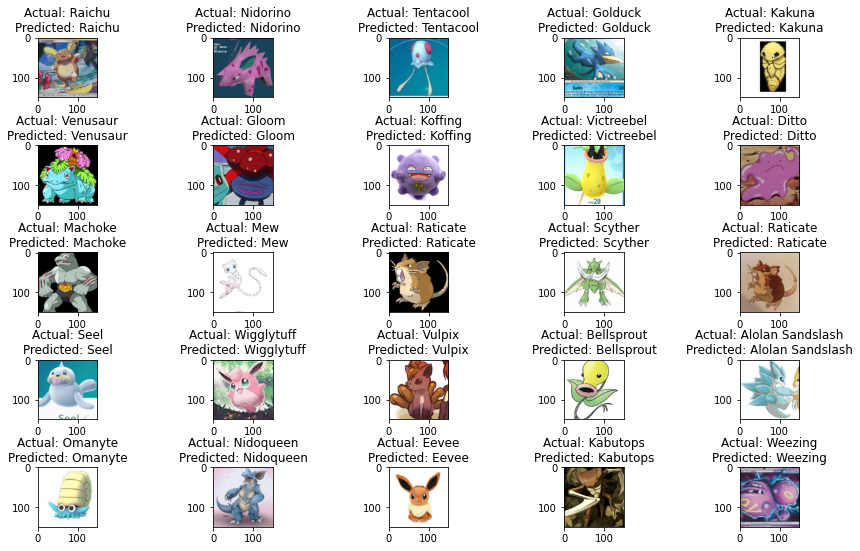

In [52]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] == y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')

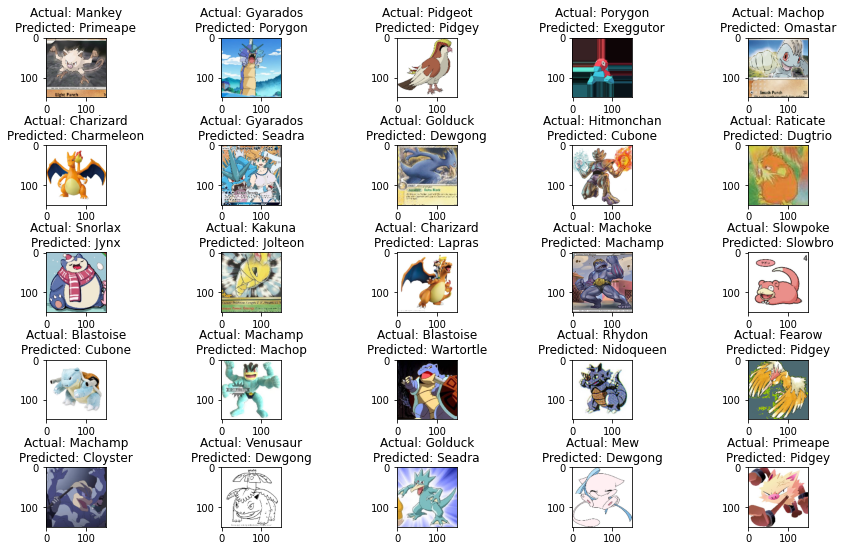

In [54]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')